# Project Title: Energy Star Score Analysis and Prediction for NYC Buildings

For this group project, we have chosen to analyze a dataset containing energy and water consumption data for buildings in New York City. The main focus of our analysis will be the **Energy Star score**

## Central Questions

The central questions driving this project are:

1. **Does this dataset contain independent variables that correlate with the Energy Star rating of a building?**
2. **For buildings without an Energy Star score, can we infer or predict their score using the available data?**

## Project Overview

Throughout the project, we will work together to explore various factors that may influence a building’s Energy Star score, including:

- Energy consumption
- Building characteristics
- Other available variables

We will also aim to build a predictive model to estimate Energy Star scores for buildings that are missing this data, based on the relationships identified in the dataset.

The ultimate goal of this project is to uncover key insights into the drivers of energy performance in NYC buildings and assess the feasibility of predicting Energy Star scores for buildings without available scores.

---

## Project Summary

Use the provided building energy data to develop a model that can predict a building's **Energy Star score**, and then interpret the results to find the variables that are most predictive of the score.

This is a **supervised, regression machine learning task**: given a set of data with targets (in this case the Energy Star score) included, we want to train a model that can learn to map the features (also known as the explanatory variables) to the target.

- **Supervised problem:** We are given both the features and the target.
- **Regression problem:** The target is a continuous variable, in this case, ranging from 0-100.
  
During training, the model will learn the relationship between the features and the score by being provided with both the features and the answer. To test how well the model has learned, we will evaluate it on a **testing set**

---

## Machine Learning Workflow

Although the exact implementation details can vary, the general structure of a machine learning project stays relatively constant:

1. **Data Cleaning and Formatting:** Prepare the dataset for analysis by handling missing values, correcting data types, and addressing any inconsistencies.
2. **Exploratory Data Analysis (EDA):** Analyze the dataset to understand its structure, distribution of features, and relationships between variables.
3. **Feature Engineering and Selection:** Create new features (if necessary) and select the most important features for the model.
4. **Establish a Baseline and Model Comparison:** Create a baseline model and compare the performance of several machine learning models based on a performance metric.
5. **Hyperparameter Tuning:** Perform hyperparameter tuning on the best model to optimize its performance.
6. **Model Evaluation:** Evaluate the best model on the testing set to assess its predictive accuracy.
7. **Interpretation of Results:** Interpret the model results to understand the relationships between features and the Energy Star score.
8. **Conclusion and Report Writing:** Draw conclusions based on the findings and write a well-documented report summarizing the analysis.

---

# Imports
#### We will use the standard data science and machine learning libraries: numpy, pandas, and scikit-learn. We also use matplotlib and seaborn for visualization.

In [15]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# Data Cleaning and Formatting
## Load in the Data and Examine

In [20]:
# Read in the data with the correct encoding
data = pd.read_csv('energyandwaterdata.csv', encoding='latin1', low_memory=False)

# Display the top of the dataframe
data.head()

,Property Id,Property Name,Parent Property Id,Parent Property Name,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Count of Buildings,Address 1 (self-reported),Address 2,Postal Code,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,6215439,Spring Creek Gardens,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3-04516-7501,3323063,NaN,901-903 Drew Street,Not Available,11208,Multifamily Housing,Multifamily Housing,Multifamily Housing,248830,Not Available,Not Available,Not Available,Not Available,1989,3,100,Whole Building,Not Available,13,132.6,137.5,16.7,0.8,263.2,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,18754001.6,200859,14229120.6,2257.7,996.1,1261.5,248830,Not Available,Not Available,258.7,02-01-2018 16.24,BROOKLYN,40.667414,-73.860358,305.0,42.0,1220.0,East New York
1,3619765,Castle Hill Ave,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1-03573-0025,2021926,NaN,604 Castle Hill Ave,Not Available,10473,Retail Store,Retail Store,Retail Store,70000,Not Available,Not Available,Not Available,Not Available,1900,1,100,Whole Building,Whole Building,Not Available,171.7,174.1,27.5,0.8,378.6,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,5317740,56302.5,6704684.2,876.9,282.5,594.4,70000,3745.7,53.51,380.5,02-01-2018 15.24,BRONX,40.819186,-73.848055,209.0,18.0,90.0,Soundview-Castle Hill-Clason Point-Harding Park
2,6202283,STB044283 St Barnabas Nursing Home 4428 3rd Ave,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2-03064-0010,2094221,NaN,4428 3rd Ave,Not Available,10457,Residential Care Facility,Residential Care Facility,Residential Care Facility,114217,Not Available,Not Available,Not Available,Not Available,1992,1,95,Whole Building,Not Available,Not Available,68.1,68.1,20,Not Available,213.8,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,7777631.3,689.6,0,689.6,114217,Not Available,Not Available,213.8,01/31/2018 11:39:32 PM,BRONX,40.853911,-73.891083,206.0,15.0,37504.0,East Tremont
3,6202292,STB044003 St Barnabas Parking 4400 3rd Ave,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2-03064-0100,2118236,NaN,4400 3rd Ave,Not Available,10457,Parking,Parking,Parking,198200,Not Available,Not Available,Not Available,Not Available,2012,1,50,Whole Building,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,1123274.8,99.6,0,99.6,198200,Not Available,Not Available,Not Available,01/31/2018 11:39:32 PM,BRONX,40.851605,-73

# Data Exploration and Target Definition

Upon reviewing the raw data, it is clear that there are **53 columns**, and many of them are not immediately clear in terms of their meanings. While some columns are reasonably understandable, others are more complex and require further interpretation.

### Target Variable: Energy Star Score

The target we are interested in predicting is the **Energy Star Score**, which is defined as:

> A 1-to-100 percentile ranking for specified building types, calculated in Portfolio Manager, based on self-reported energy usage for the reporting year.

This score is a relative ranking of buildings’ energy efficiency, with 1 being the least efficient and 100 being the most efficient. Since it is a percentile ranking, the distribution of scores should be fairly uniform across buildings.

To gain more insight into the dataset, we will focus on understanding the columns that are most relevant to the Energy Star Score, even if we don't need to explore every single column in detail.

## Data Types and Missing Values

The `dataframe.info()` method is a quick way to assess the data by displaying the data types of each column and the number of non-missing values. From examining the dataframe, there may be an issue because missing values are coded as `"Not Available"` rather than as `np.nan` (Not a Number).

In [21]:
# See the column data types and non-missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16378 entries, 0 to 16377
Data columns (total 53 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Property Id                                                 16378 non-null  int64  
 1   Property Name                                               16378 non-null  object 
 2   Parent Property Id                                          16378 non-null  object 
 3   Parent Property Name                                        16378 non-null  object 
 4   NYC Borough, Block and Lot (BBL) self-reported              16378 non-null  object 
 5   NYC Building Identification Number (BIN)                    16378 non-null  object 
 6   Count of Buildings                                          197 non-null    float64
 7   Address 1 (self-reported)                                   16378 non-null  object 
 

Sure enough, there are a number of columns with numbers that have been recorded as `object` datatypes. These will have to be converted to `float` datatype before we can do any numerical analysis. 

### Convert Data to Correct Types

We convert the columns with numbers into numeric data types by replacing the "Not Available" entries with `np.nan` which can be interpreted as floats. Then we will convert the columns that contain numeric values (such as square feet or energy usage) into numeric datatypes. 

In [22]:
# Replace all occurrences of Not Available with numpy not a number
data = data.replace({'Not Available': np.nan})

# Iterate through the columns
for col in list(data.columns):
    # Select columns that should be numeric
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        # Convert the data type to float
        data[col] = data[col].astype(float)

In [23]:
# Statistics for each column
data.describe()

,Property Id,Count of Buildings,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,1.637800e+04,197.000000,1.636700e+04,16371.0,1716.000000,16378.000000,16378.000000,16378.000000,12822.000000,16095.000000,14517.000000,15287.000000,13719.000000,14517.000000,1.900000e+01,3.788000e+03,1.769000e+03,6.530000e+02,4.000000e+01,1.212000e+03,1.437000e+04,1.372400e+04,1.597700e+04,1.621800e+04,1.621600e+04,1.624100e+04,1.637800e+04,8.686000e+03,8686.000000,16095.000000,15648.000000,15648.000000,15648.000000,15648.000000,15648.000000
mean,3.614539e+06,12.730964,1.659042e+05,25000.0,12673.443998,1950.203871,1.353157,98.717487,60.555452,228.991028,248.976820,11.088611,1.550871,349.409051,2.091540e+06,3.141022e+06,5.470590e+06,2.568471e+06,8.260644e+05,2.134963e+08,3.913264e+07,4.123278e+05,6.074167e+06,3.567761e+03,1.951923e+03,1.617226e+03,1.718618e+05,1.677852e+04,140.055094,327.838459,40.747232,-73.936541,231.011631,18.592025,7656.710251
std,1.163490e+06,13.076061,4.051155e+05,0.0,29548.777390,32.404250,4.146161,7.756664,30.315434,7300.206821,8230.999498,110.170977,82.124022,8858.767164,2.053769e+06,9.137073e+06,5.809427e+06,5.391214e+06,2.652496e+06,2.723615e+09,3.312735e+09,3.396614e+07,2.957183e+07,1.730928e+05,1.657659e+05,4.986913e+04,4.120446e+05,1.495902e+05,1660.845586,7899.576647,0.075898,0.066959,122.906901,15.014731,21410.078016
min,7.365000e+03,1.000000,5.400000e+01,25000.0,0.000000,1000.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.300000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.690797e+08,0.000000e+00,0.000000e+00,-5.567310e+04,0.000000e+00,0.000000e+00,-2.313430e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,40.509037,-74.244118,101.000000,1.000000,1.000000
25%,2.721265e+06,3.000000,6.218400e+04,25000.0,1674.250000,1927.000000,1.000000,100.000000,37.000000,60.300000,63.700000,4.000000,0.100000,103.400000,3.822986e+05,2.080522e+05,2.533830e+06,0.000000e+00,0.000000e+00,4.320254e+06,8.903050e+05,9.515500e+03,1.029288e+06,3.101250e+02,1.137750e+02,9.310000e+01,6.370000e+04,2.561725e+03,26.597500,99.000000,40.704960,-73.980492,107.000000,5.000000,113.000000
50%,3.292840e+06,9.000000,9.000000e+04,25000.0,5122.500000,1948.000000,1.000000,100.000000,67.000000,78.200000,82.200000,5.700000,0.500000,131.900000,1.396099e+06,8.971449e+05,4.526146e+06,0.000000e+00,0.000000e+00,1.007174e+07,3.746174e+06,4.055010e+04,1.859664e+06,4.865000e+02,2.567500e+02,1.721000e+02,9.240000e+04,4.702500e+03,44.840000,126.900000,40.750628,-73.952225,207.000000,14.000000,249.000000
75%,4.594752e+06,17.000000,1.529500e+05,25000.0,12021.250000,1970.000000,1.000000,100.000000,87.000000,100.250000,105.200000,10.500000,0.700000,177.700000,3.589409e+06,4.046367e+06,6.608338e+06,4.259104e+06,2.219416e+05,2.125414e+07,6.546138e+06,7.030240e+04,4.393544e+06,8.965500e+02,4.312250e+02,4.243000e+02,1.574608e+05,8.163225e+03,70.702500,172.100000,40.798825,-73.901150,314.000000,30.000000,809.000000
max,6.215439e+06,61.000000,2.788265e+07,25000.0,5916

## Missing Values

Now that we have the correct column datatypes, we can start analysis by looking at the percentage of missing values in each column. Missing values are fine when we do Exploratory Data Analysis, but they will have to be filled in for machine learning methods.

In [24]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [25]:
missing_values_table(data)

Your selected dataframe has 53 columns.
There are 41 columns that have missing values.


,Missing Values,% of Total Values
Fuel Oil #1 Use (kBtu),16359,99.9
Diesel #2 Use (kBtu),16338,99.8
Count of Buildings,16181,98.8
Address 2,16085,98.2
Fuel Oil #5 & 6 Use (kBtu),15725,96.0
District Steam Use (kBtu),15166,92.6
3rd Largest Property Use Type,14662,89.5
3rd Largest Property Use Type - Gross Floor Area (ft²),14662,89.5
Fuel Oil #4 Use (kBtu),14609,89.2
Fuel Oil #2 Use (kBtu),12590,76.9


For this project, we will remove any columns with more than 50% missing values.  

In [26]:
# Get the columns with > 50% missing
missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 53 columns.
There are 41 columns that have missing values.
We will remove 12 columns.


In [27]:
# Drop the columns
data = data.drop(columns = list(missing_columns))

The rest of the missing values will have to be imputed (filled-in) using an appropriate strategy before doing machine learning.

# Exploratory Data Analysis

To begin the EDA, we will focus on a single variable, the Energy Star Score, because this is the target for our machine learning models. We can rename the column to `score` for simplicity and then start exploring this value.

## Single Variable Plots

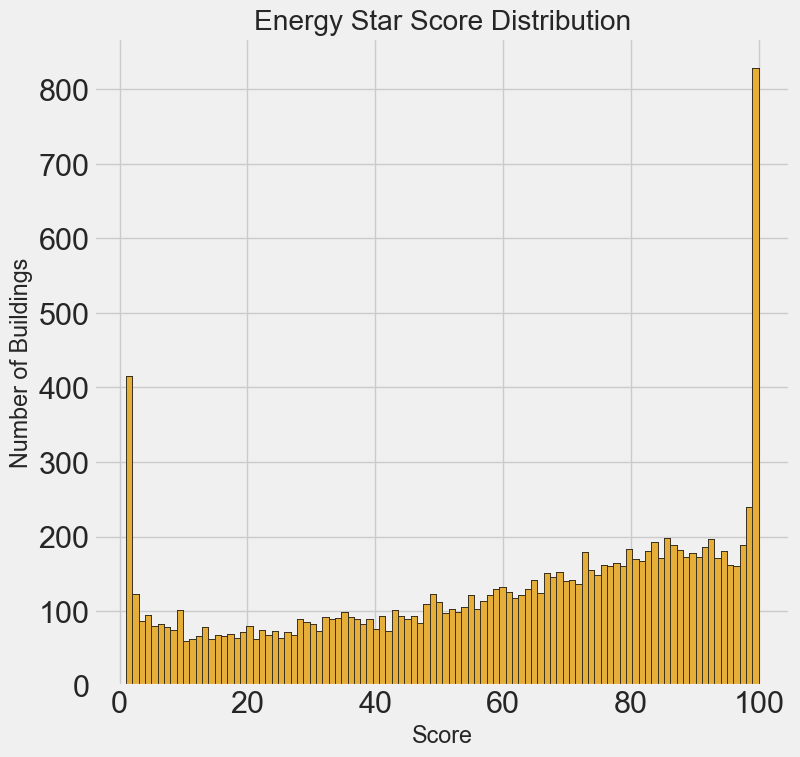

In [30]:
figsize(8, 8)

# Rename the score 
data = data.rename(columns = {'ENERGY STAR Score': 'score'})

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.title('Energy Star Score Distribution');
# Show the plot
plt.show()

As the Energy Star Score is a percentile rank, we would expect to see a completely flat distribution with each score making up 1% of the distribution (about 90 buildings). However, this is definitely not the case as we can see that the two most common scores, 1 and 100, make up a disproporationate number of the overall scores. 

To contrast the Energy Star Score, we can look at the Energy Use Intensity (EUI), which is the total energy use divided by the square footage of the building. Here the energy usage is not self-reported, so this could be a more objective measure of the energy efficiency of a building.

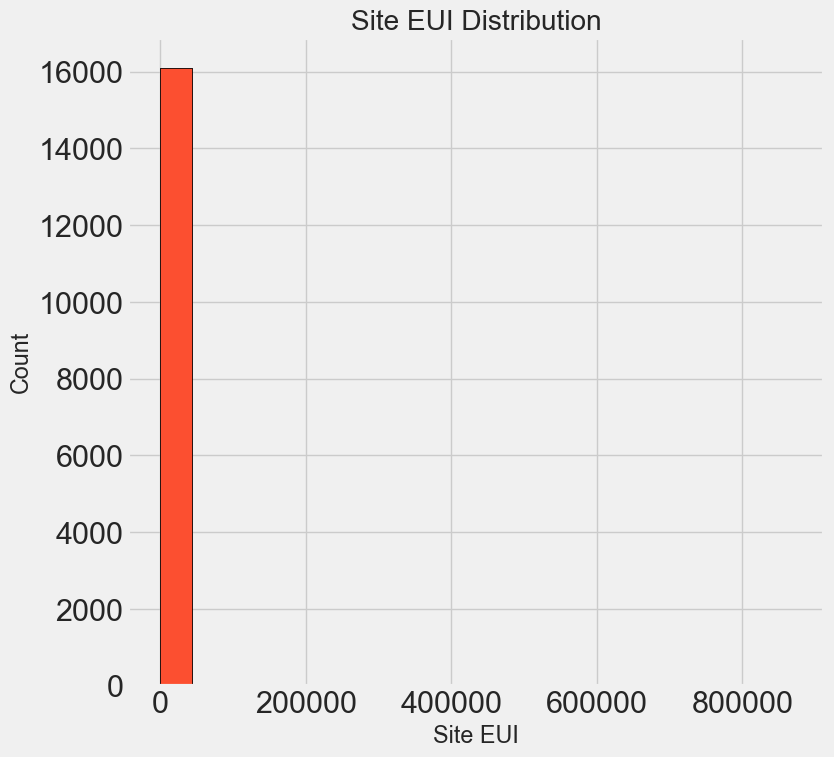

In [32]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');
# Show the plot
plt.show()

The graph is incredibly skewed because of the presence of a few buildings with very high scores (outliners)

In [33]:
data['Site EUI (kBtu/ft²)'].describe()

count     16095.000000
mean        228.991028
std        7300.206821
min           0.000000
25%          60.300000
50%          78.200000
75%         100.250000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [34]:
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

14058     51328.8
14056     51831.2
2889      78360.1
3102      84969.6
16035     95560.2
3101     103562.7
3100     112173.6
16376    126307.4
9681     143974.4
1635     869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

In [35]:
data.loc[data['Site EUI (kBtu/ft²)'] == 869265, :]

,Property Id,Property Name,Parent Property Id,Parent Property Name,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
1635,4414323,234 Skillman,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3028937502,"3390250 , 3338313",234 Skillman avenue,11211,Multifamily Housing,Multifamily Housing,Multifamily Housing,56900.0,25000.0,2004,1,90,Whole Building,1.0,869265.0,939329.0,9.9,9393.0,986366.0,4.945919e+10,534458968.8,1983655.6,2627199.1,2627015.0,184.1,56900.0,2547.9,44.78,912801.1,05-01-2017 23.34,BROOKLYN,40.716233,-73.94141,301.0,34.0,477.0,East Williamsburg


### Removing Outliers

* On the low end, an extreme outlier is below  $\text{First Quartile} -3 * \text{Interquartile Range}$
* On the high end, an extreme outlier is above $\text{Third Quartile} + 3 * \text{Interquartile Range}$

In this case, we will only remove the single outlying point and see how the distribution looks.

In [36]:
# Calculate first and third quartile
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
            (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

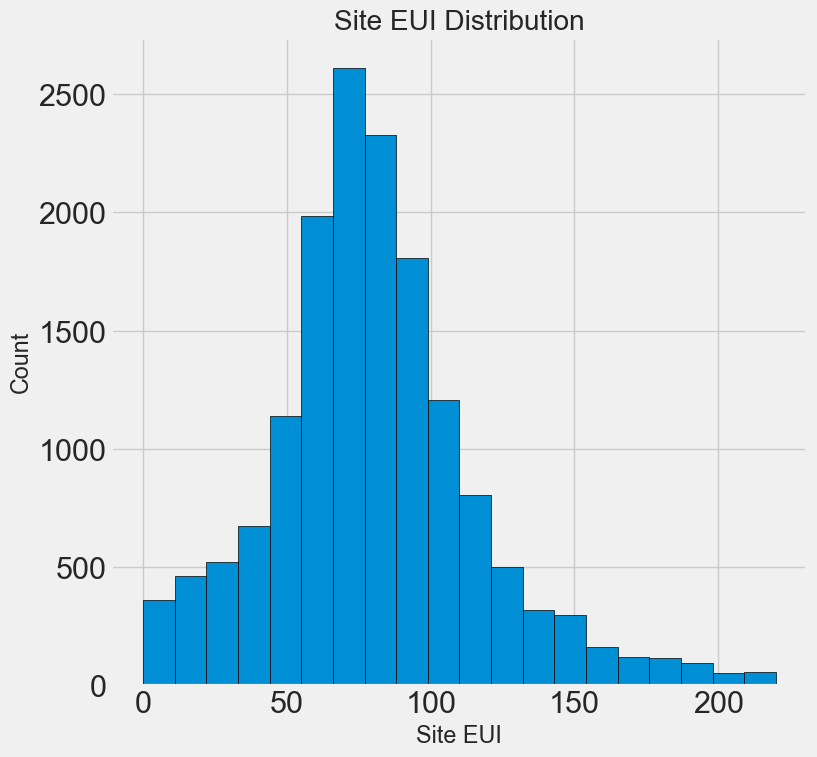

In [37]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');
# Show the plot
plt.show()

This plot looks a little less suspicious and is close to normally distributed with a long tail on the right side (it has a positive skew). 

## Looking for Relationships

In order to look at the effect of categorical variables on the score, we can make a density plot
The first plot we will make shows the distribution of scores by the property type. In order to not clutter the plot, we will limit the graph to building types that have more than 100 observations in the dataset. 

In [43]:
# Create a list of buildings with more than 100 measurements
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

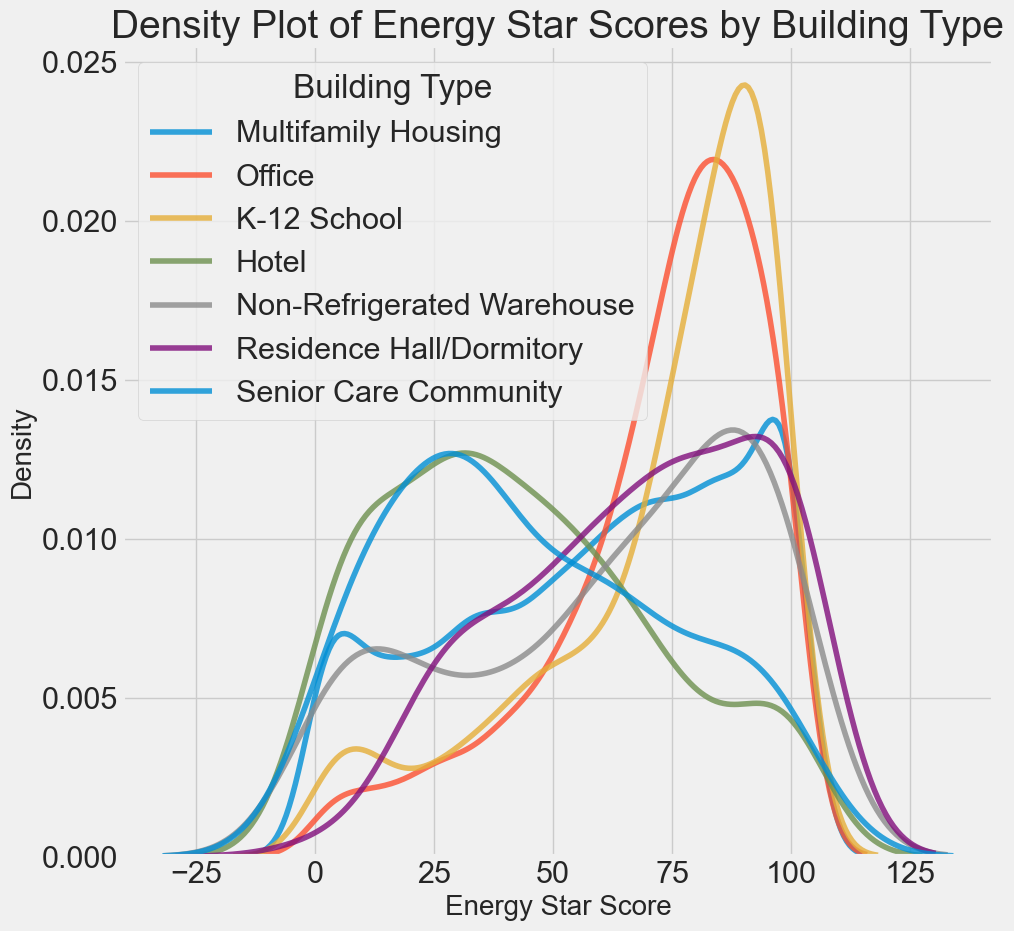

In [48]:
# Plot of distribution of scores for building categories
plt.figure(figsize=(10, 10))

# Plot each building
for b_type in types:
    # Select the building type
    subset = data[data['Largest Property Use Type'] == b_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = b_type, fill = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28);
plt.legend(title='Building Type')
plt.show()

From this graph, we can see that the building type does have an effect on the score (the negative scores on the graph are an artifact of the kernel density estimation procedure. As building type is a categorical variable, it will have to be one-hot encoded before we can feed it into a machine learning model. 

To examine another categorical variable, borough, we can make the same graph, but this time colored by the borough.

In [49]:
# Create a list of boroughs with more than 100 observations
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

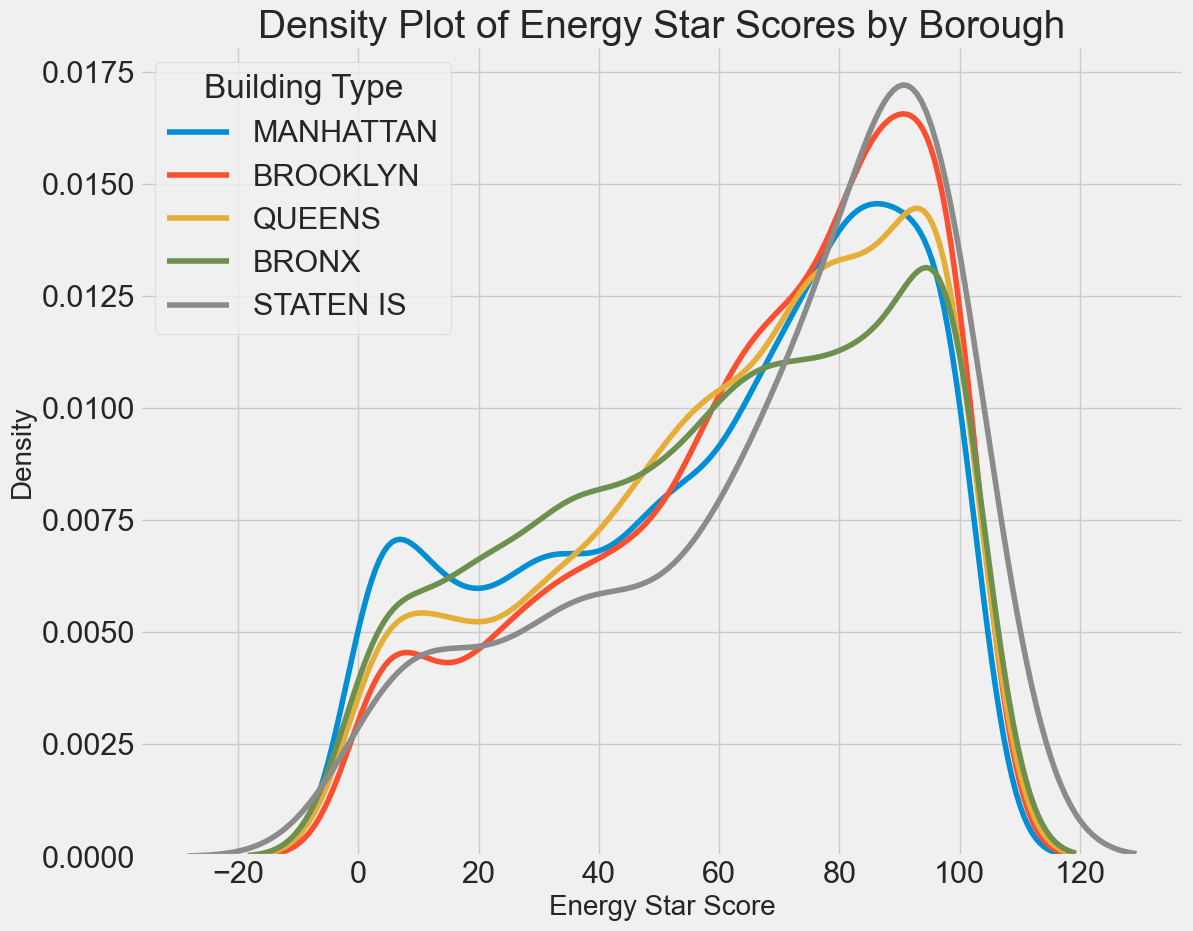

In [50]:
# Plot of distribution of scores for boroughs
figsize(12, 10)

# Plot each borough distribution of scores
for borough in boroughs:
    # Select the building type
    subset = data[data['Borough'] == borough]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = borough);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Borough', size = 28);
plt.legend(title='Building Type')
plt.show()

The borough of the building does not seem to make as significant a difference in the distribution of the score as does the building type. Nonetheless, it might make sense to include the borough as a categorical variable. 

## Correlations between Features and Target

In order to quantify correlations between the features (variables) and the target, we can calculate the Pearson correlation coefficient This is a measure of the strength and direction of a linear relationship between two variables: a value of -1 means the two variables are perfectly negatively linearly correlated and a value of +1 means the two variables are perfectly positively linearly correlated.

In [52]:
# Compute correlations only for numeric columns
numeric_data = data.select_dtypes(include='number')

# Find correlation of all numeric columns with 'score' and sort
correlations_data = numeric_data.corr()['score'].sort_values()

# Print most negative correlations
print("Most Negative Correlations:\n", correlations_data.head(15), '\n')

# Print most positive correlations
print("Most Positive Correlations:\n", correlations_data.tail(15))


Most Negative Correlations:
 Site EUI (kBtu/ft²)                                          -0.717706
Weather Normalized Site EUI (kBtu/ft²)                       -0.706012
Weather Normalized Source EUI (kBtu/ft²)                     -0.644564
Source EUI (kBtu/ft²)                                        -0.640445
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.386304
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.380698
Year Built                                                   -0.130002
Property Id                                                  -0.111590
Total GHG Emissions (Metric Tons CO2e)                       -0.101863
Natural Gas Use (kBtu)                                       -0.096650
Weather Normalized Site Natural Gas Use (therms)             -0.094197
Direct GHG Emissions (Metric Tons CO2e)                      -0.092325
Electricity Use - Grid Purchase (kBtu)                       -0.064661
Latitude                                        

There are several strong negative correlations between the features and the target. The most negative correlations with the score are the different categories of Energy Use Intensity (EUI), `Site EUI (kBtu/ft²)` and  `Weather Normalized Site EUI (kBtu/ft²)` (these vary slightly in how they are calculated). The EUI is the amount of energy used by a building divided by the square footage of the buildings and is meant to be a measure of the efficiency of a building with a lower score being better.

In the following code, we take log and square root transformations of the numerical variables, one-hot encode the two selected categorical variables (building type and borough), calculate the correlations between all of the features and the score, and display the top 15 most positive and top 15 most negative correlations.

In [55]:
# Select the numeric columns
numeric_subset = data.select_dtypes('number').copy()

# Suppress sqrt/log warnings and create transformed features
with np.errstate(divide='ignore', invalid='ignore'):
    for col in numeric_subset.columns:
        if col == 'score':
            continue  # Skip the target variable
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select and encode categorical columns
categorical_subset = pd.get_dummies(data[['Borough', 'Largest Property Use Type']])

# Combine numeric and categorical features
features = pd.concat([numeric_subset, categorical_subset], axis=1)

# Drop rows without Energy Star Score
features = features.dropna(subset=['score'])

# Compute and sort correlations with Energy Star Score
correlations = features.corr()['score'].dropna().sort_values()

In [56]:
# Display most negative correlations
correlations.head(15)

Site EUI (kBtu/ft²)                                            -0.717706
Weather Normalized Site EUI (kBtu/ft²)                         -0.706012
sqrt_Site EUI (kBtu/ft²)                                       -0.701430
sqrt_Weather Normalized Site EUI (kBtu/ft²)                    -0.688064
sqrt_Weather Normalized Source EUI (kBtu/ft²)                  -0.675579
sqrt_Source EUI (kBtu/ft²)                                     -0.674433
Weather Normalized Source EUI (kBtu/ft²)                       -0.644564
Source EUI (kBtu/ft²)                                          -0.640445
log_Source EUI (kBtu/ft²)                                      -0.625780
log_Weather Normalized Source EUI (kBtu/ft²)                   -0.623230
log_Site EUI (kBtu/ft²)                                        -0.613524
log_Weather Normalized Site EUI (kBtu/ft²)                     -0.600510
log_Weather Normalized Site Electricity Intensity (kWh/ft²)    -0.436877
sqrt_Weather Normalized Site Electricity Intensity 

In [57]:
# Display most positive correlations
correlations.tail(15)

Largest Property Use Type_Supermarket/Grocery Store                0.030673
sqrt_Largest Property Use Type - Gross Floor Area (ft²)            0.031254
Largest Property Use Type_Hospital (General Medical & Surgical)    0.040914
log_Property GFA - Self-Reported (ft²)                             0.041416
log_Largest Property Use Type - Gross Floor Area (ft²)             0.046952
Borough_BROOKLYN                                                   0.058106
Community Board                                                    0.060366
log_Community Board                                                0.060915
sqrt_Community Board                                               0.060990
log_Council District                                               0.074922
sqrt_Council District                                              0.077509
Council District                                                   0.078722
Largest Property Use Type_K-12 School                              0.118957
Largest Prop

After transforming the features, the strongest relationships are still those related to Energy Use Intensity (EUI). The log and square root transformations do not seem the have resulted in any stronger relationships. There are no strong positive linear relationships although we do see that a building type of office (`Largest Property Use Type_Office`) is slightly positively correlated with the score. This variable is a one-hot encoded representation of the categorical variables for building type.

## Two-Variable Plots

In order to visualize the relationship between two variables, we use a scatterplot.

<Figure size 1200x1000 with 0 Axes>

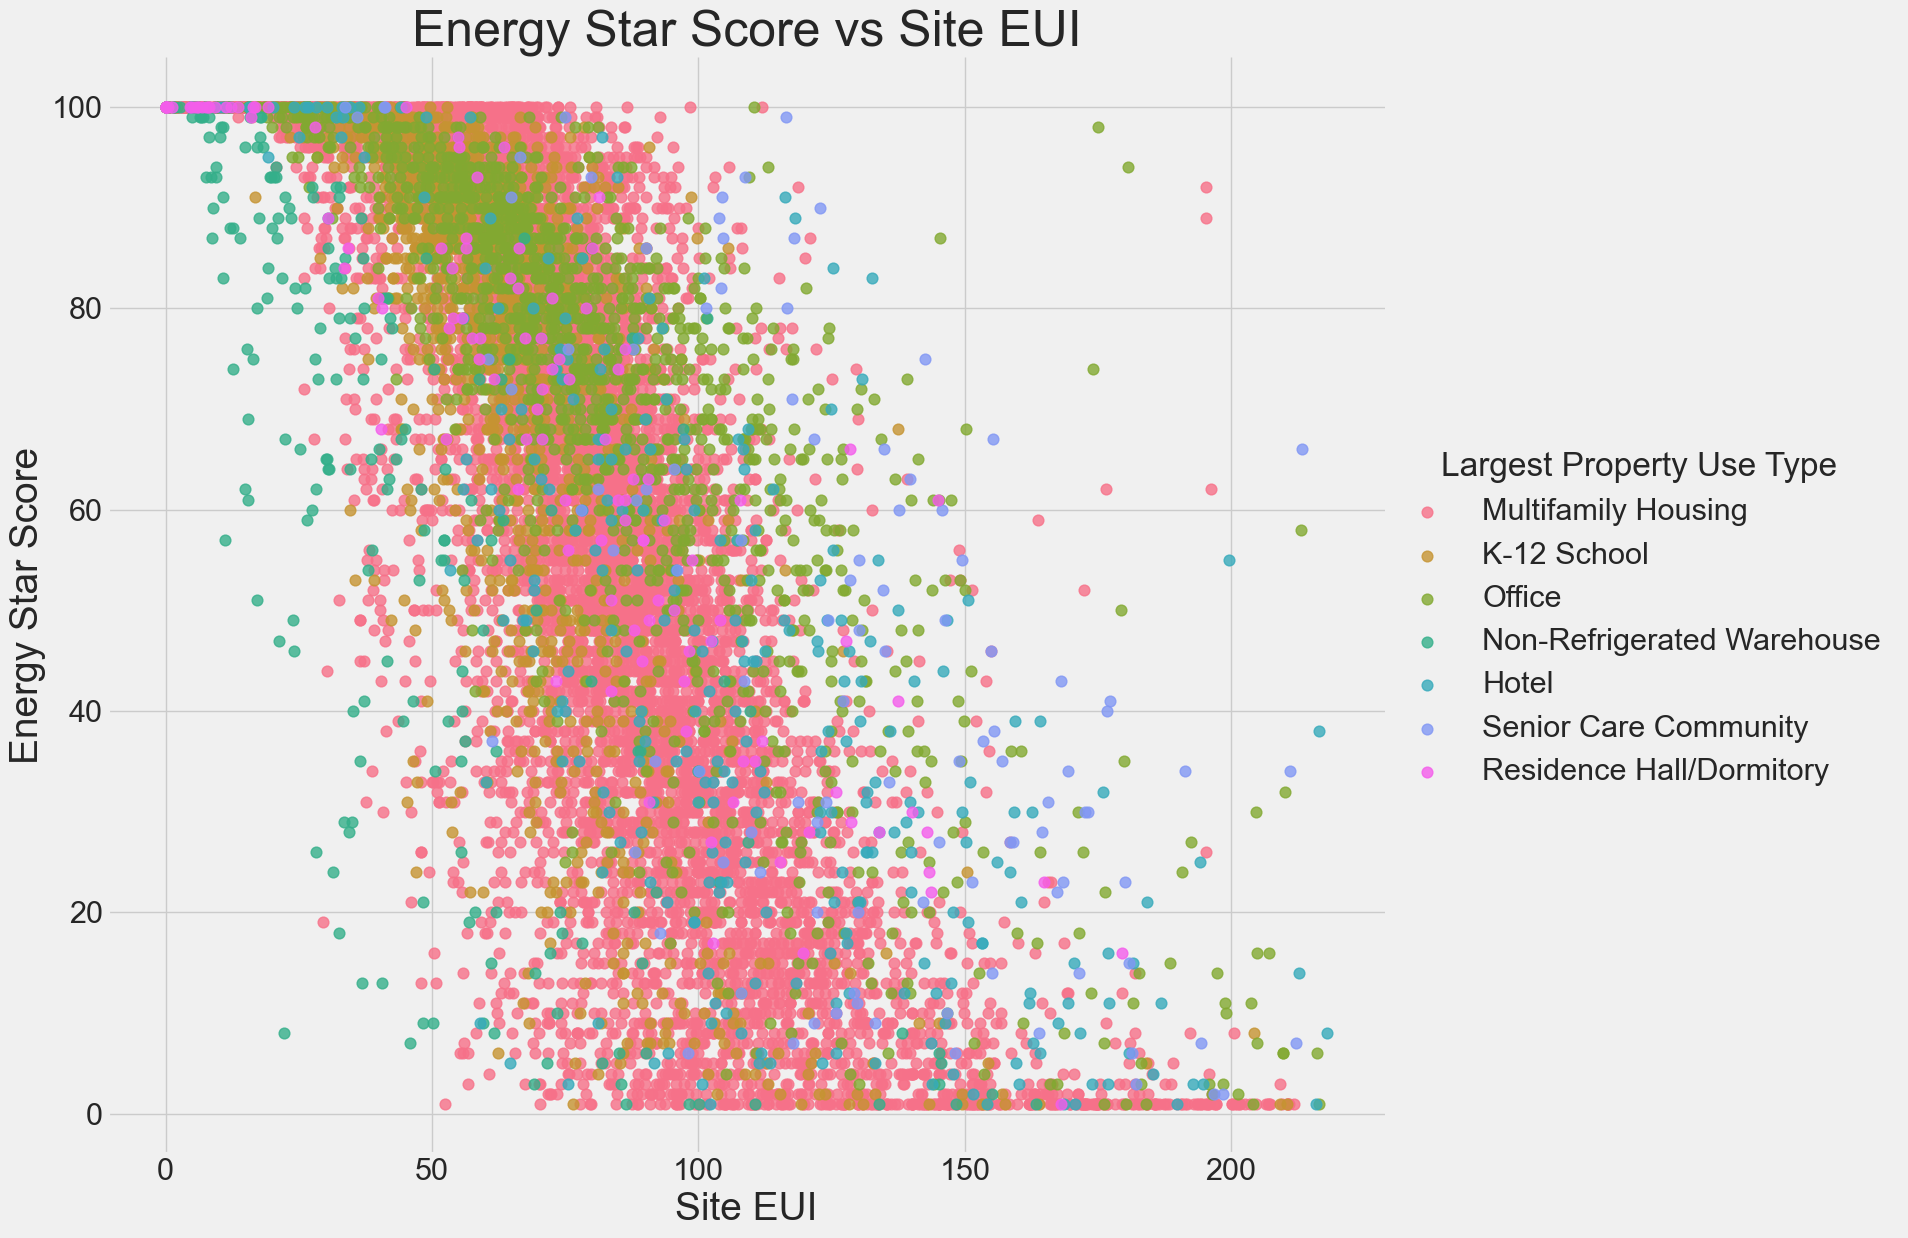

In [60]:
# Set the figure size
plt.figure(figsize=(12, 10))

# Re-add the building type column
features['Largest Property Use Type'] = data.dropna(subset=['score'])['Largest Property Use Type']

# Filter for types with enough data
features = features[features['Largest Property Use Type'].isin(types)]

# Scatterplot without regression line
sns.lmplot(
    x='Site EUI (kBtu/ft²)', y='score',
    hue='Largest Property Use Type', data=features,
    scatter_kws={'alpha': 0.8, 's': 60},
    fit_reg=False, height=12, aspect=1.2
)

# Plot labeling
plt.xlabel("Site EUI", size=28)
plt.ylabel("Energy Star Score", size=28)
plt.title("Energy Star Score vs Site EUI", size=36)
plt.show()

There is a clear negative relationship between the Site EUI and the score. The relationship is not perfectly linear (it looks with a correlation coefficient of -0.7, but it does look like this feature will be important for predicting the score of a building. 

### Pairs Plot

As a final exercise for exploratory data analysis, we can make a pairs plot between several different variables. The Pairs Plot is a great way to examine many variables at once as it shows scatterplots between pairs of variables and histograms of single variables on the diagonal. 

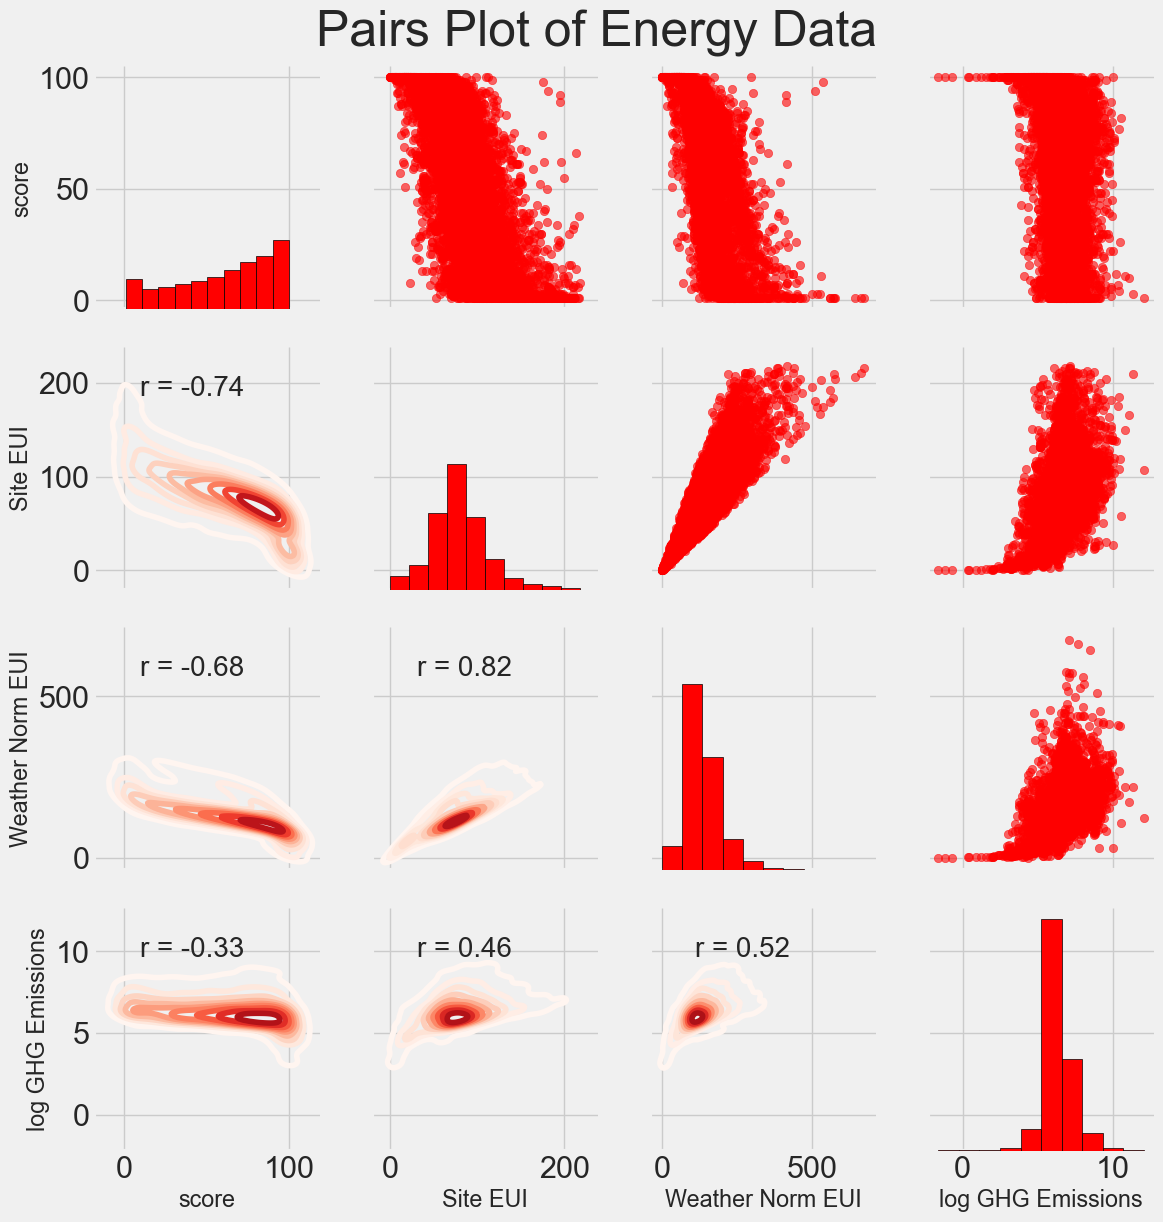

In [62]:
# Extract and prepare data
plot_data = features[['score', 'Site EUI (kBtu/ft²)', 
                      'Weather Normalized Source EUI (kBtu/ft²)', 
                      'log_Total GHG Emissions (Metric Tons CO2e)']]

# Clean inf/nan values
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan}).dropna()

# Rename columns for easier plotting
plot_data = plot_data.rename(columns={
    'Site EUI (kBtu/ft²)': 'Site EUI',
    'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
    'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'
})

# Define custom correlation annotation function
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate(f"r = {r:.2f}", xy=(.2, .8), xycoords=ax.transAxes, size=20)

# Create the PairGrid with the updated parameter
grid = sns.PairGrid(data=plot_data, height=3)

# Map plots to upper, lower, and diagonal
grid.map_upper(plt.scatter, color='red', alpha=0.6)
grid.map_diag(plt.hist, color='red', edgecolor='black')
grid.map_lower(corr_func)
grid.map_lower(sns.kdeplot, cmap=plt.cm.Reds)

# Set the title for the entire plot
plt.suptitle('Pairs Plot of Energy Data', size=36, y=1.02)
plt.show()

To interpret the relationships in the plot, we can look for where the variables in one row intersect with the variables in one column. For example, to find the relationship between score and the log of GHG Emissions, we look at the score column and find the log GHG Emissions row. At the intersection (the lower left plot) we see that the score has a -0.33 correlation coefficient with this varible. If we look at the upper right plot, we can see a scatterplot of this relationship. 

# Feature Engineering and Selection

In particular, we learned the following from EDA which can help us in engineering/selecting features:

* The score distribution varies by building type and to a lesser extent by borough. Although we will focus on numerical features, we should also include these two categorical features in the model. 
* Taking the log transformation of features does not result in significant increases in the linear correlations between features and the score

In this project, we will take the following steps for feature engineering:

* Select only the numerical variables and two categorical variables (borough and property use type)
* Add in the log transformation of the numerical variables
* One-hot encode the categorical variables

For feature selection, we will do the following:

* Remove collinear features

The following code selects the numeric features, adds in log transformations of all the numeric features, selects and one-hot encodes the categorical features, and joins the sets of features together. 

In [64]:
# Copy the original data
features = data.copy()

# Select numeric columns
numeric_subset = data.select_dtypes('number').copy()

# Suppress warnings for invalid log values (e.g., log(0), log(negative))
with np.errstate(divide='ignore', invalid='ignore'):
    for col in numeric_subset.columns:
        if col == 'score':
            continue  # skip target column
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select categorical columns
categorical_subset = pd.get_dummies(data[['Borough', 'Largest Property Use Type']])

# Concatenate numeric and categorical data
features = pd.concat([numeric_subset, categorical_subset], axis=1)

# Check resulting shape
features.shape

(15628, 118)

At this point, we have 15628 observations (buildings) with 118 different features (one column is the score). Not all of these features are likely to be important for predicting the score, and several of these features are also redundant because they are highly correlated.

## Remove Collinear Features

In our dataset, the `Site EUI` and `Weather Norm EUI` are highly correlated because they are just slightly different means of calculating the energy use intensity. 

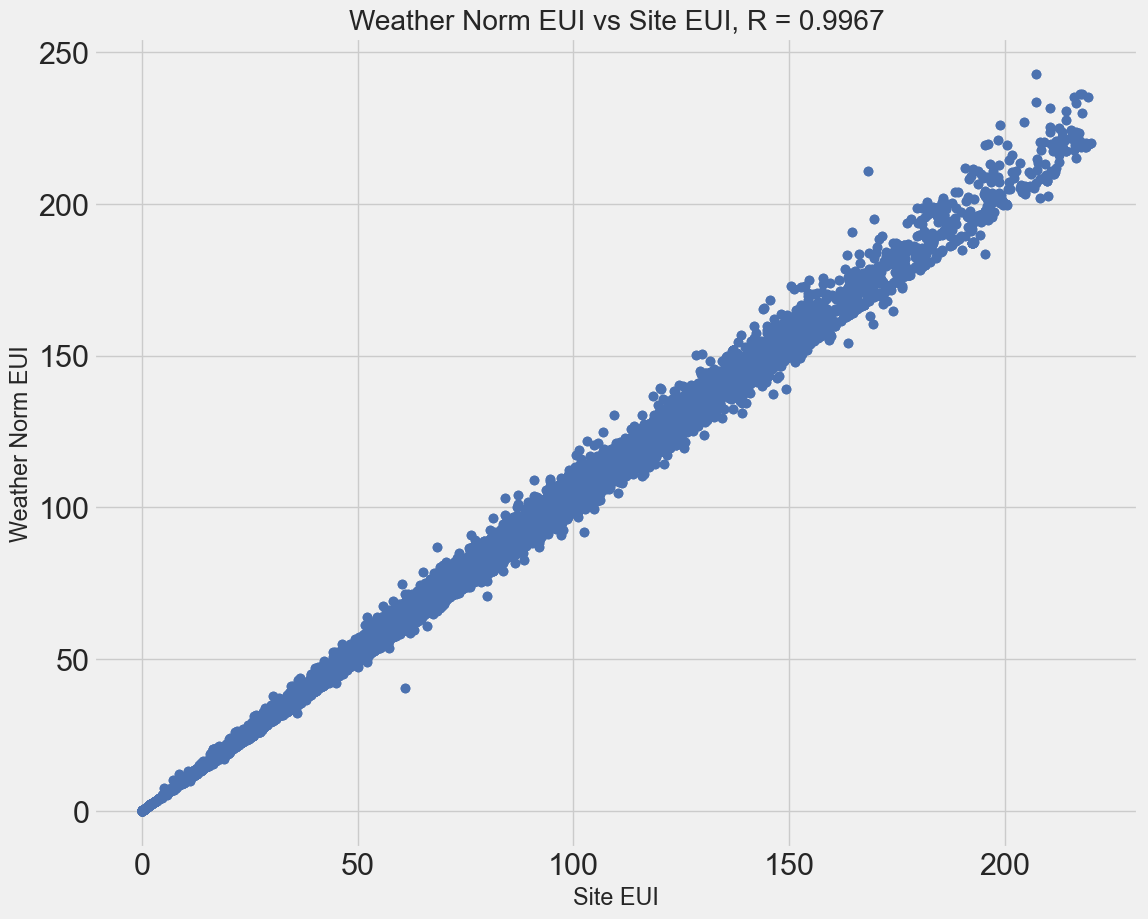

In [66]:
plot_data = data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna()

plt.plot(plot_data['Site EUI (kBtu/ft²)'], plot_data['Weather Normalized Site EUI (kBtu/ft²)'], 'bo')
plt.xlabel('Site EUI'); plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % np.corrcoef(data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1]);
plt.show()

Removing collinear features is a method to reduce model complexity by decreasing the number of features and can help to increase model generalization.  It can also help us to interpret the model because we only have to worry about a single variable, such as EUI, rather than how both EUI and weather normalized EUI affect the score. 

We will use a threshold of 0.6 which removes one of a pair of features if the correlation coefficient between the features exceeds this value. 

In [67]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['score']
    x = x.drop(columns = ['score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
    x['score'] = y
               
    return x

In [68]:
# Remove the collinear features above a specified correlation coefficient
features = remove_collinear_features(features, 0.6);

In [69]:
# Remove any columns with all na values
features  = features.dropna(axis=1, how = 'all')
features.shape

(15628, 80)

Our final dataset now has 80 features (one of the columns is the target). This is still quite a few, but mostly it is because we have one-hot encoded the categorical variables.

#### Additional Feature Selection

## Split Into Training and Testing Sets

For our problem, we will first extract all the buildings without an Energy Star Score. Then, we will split the buildings with an Energy Star Score into a testing set of 30% of the buildings, and a training set of 70% of the buildings. 

In [70]:
# Extract the buildings with no score and the buildings with a score
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)

(3053, 80)
(12575, 80)


In [71]:
# Separate out the features and targets
features = score.drop(columns='score')
targets = pd.DataFrame(score['score'])

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(8802, 79)
(3773, 79)
(8802, 1)
(3773, 1)


We have 3053 buildings with no score, 8802 buildings with a score in the training set, and 3773 buildings with a score in the testing set. 

# Establish a Baseline 
For a regression task, a good naive baseline is to predict the median value of the target on the training set for all examples on the test set. This is simple to implement and sets a relatively low bar for our models: if they cannot do better than guessing the medin value, then we will need to rethink our approach. 

## Metric: Mean Absolute Error

The function below calculates the mean absolute error between true values and predictions.

In [72]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

Now we can make the median guess and evaluate it on the test set.

In [73]:
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 68.00
Baseline Performance on the test set: MAE = 24.4294


This shows our average estimate on the test set is off by about 25 points. The scores are between 1 and 100 so this means the average error from a naive method if about 25%. The naive method of guessing the median training value provides us a low baseline for our models to beat! 

# Conclusions

In this notebook, we carried out the first three steps

1. Cleaned and formatted the raw data 
2. Performed an exploratory data analysis
3. Developed a set of features to train our model using feature engineering and feature selection

We also completed the crucial task of establishing a baseline metric.

In [75]:
# Save the no scores, training, and testing data
no_score.to_csv('no_score.csv', index = False)
X.to_csv('training_features.csv', index = False)
X_test.to_csv('testing_features.csv', index = False)
y.to_csv('training_labels.csv', index = False)
y_test.to_csv('testing_labels.csv', index = False)